In [1]:
#Pandas kütüphanemizi import edelim
import pandas as pd

In [2]:
#Verimizi yükleyelim;
data=pd.read_csv('House_price.csv')

In [3]:
#Veri setimizin birkaç satırını inceleyelim
data.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#Veri seti hakkında genel bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Avg. Area Income    4548 non-null   float64
 1   House Age           4548 non-null   float64
 2   Number of Rooms     4548 non-null   float64
 3   Number of Bedrooms  4548 non-null   float64
 4   Area Population     4548 non-null   float64
 5   Price               4548 non-null   float64
 6   Address             4548 non-null   object 
dtypes: float64(6), object(1)
memory usage: 248.8+ KB


In [5]:
#Eksik veri kontrolü
data.isnull().sum()

Avg. Area Income      0
House Age             0
Number of Rooms       0
Number of Bedrooms    0
Area Population       0
Price                 0
Address               0
dtype: int64

In [6]:
#İstatiksel özetini alalım
data.describe()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4.548000e+03
mean,68611.700818,5.978918,6.987646,3.981693,36187.469334,1.233916e+06
std,10686.487761,0.990850,1.006587,1.230939,9910.189915,3.545676e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61485.150192,5.332187,6.299692,3.140000,29423.163510,9.977751e+05
50%,68817.036575,5.960872,7.002245,4.050000,36215.560985,1.234571e+06
75%,75820.741747,6.658368,7.665871,4.490000,42880.554642,1.470616e+06
max,107701.748400,9.519088,10.759588,6.500000,69592.040240,2.469066e+06


In [15]:
#Veri tiplerinde dönüşümler
data['House Age']=data['House Age'].astype(int)
data['Number of Bedrooms']=data['Number of Bedrooms'].astype(int)


In [16]:
#Ev fiyatını dönüştürelim
data['Price'] = data['Price'].round().astype(int)

In [17]:
#Adres değişkenini numeric hale dönüştürelim
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Address']= label_encoder.fit_transform(data['Address'])

In [18]:
#Veri setimizi tekrar inceleyelim
data.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,Number of Rooms
0,79545.45857,5,7.009188,4,23086.80050,1059034,886,7
1,79248.64245,6,6.730821,3,40173.07217,1505891,793,6
2,61287.06718,5,8.512727,5,36882.15940,1058988,3711,8
3,63345.24005,7,5.586729,3,34310.24283,1260617,4367,5
4,59982.19723,5,7.839388,4,26354.10947,630943,4317,7


In [19]:
data['Number of  Rooms']=data['Number of Rooms'].astype(int)

In [20]:
data.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,Number of Rooms
0,79545.45857,5,7.009188,4,23086.80050,1059034,886,7
1,79248.64245,6,6.730821,3,40173.07217,1505891,793,6
2,61287.06718,5,8.512727,5,36882.15940,1058988,3711,8
3,63345.24005,7,5.586729,3,34310.24283,1260617,4367,5
4,59982.19723,5,7.839388,4,26354.10947,630943,4317,7


In [21]:

import numpy as np                        # Nümerik işlemler için
from sklearn.model_selection import train_test_split  # Eğitim ve test setine bölme
from sklearn.linear_model import LinearRegression     # Çoklu lineer regresyon modeli
from sklearn.metrics import mean_squared_error, r2_score  # Model değerlendirme metrikleri


In [24]:
#Bağımlı bagımsız degiskenimizi belirleyelim
X=data.drop('Price',axis=1)
y=data[['Price']]

In [25]:
#Veriyi test ve train seti olarak ayıralım
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
#Model egitelim
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [27]:
#Model ile tahmin
y_predic=model.predict(X_test)

In [29]:
#odel degerlendirmesi
mse=mean_squared_error(y_test,y_predic)
r2=r2_score(y_test,y_predic)

In [30]:
mse

12226650550.600155

In [31]:
r2

0.8931125003820874

Text(0.5, 1.0, 'Ev Fiyat Korelasyon Haritası')

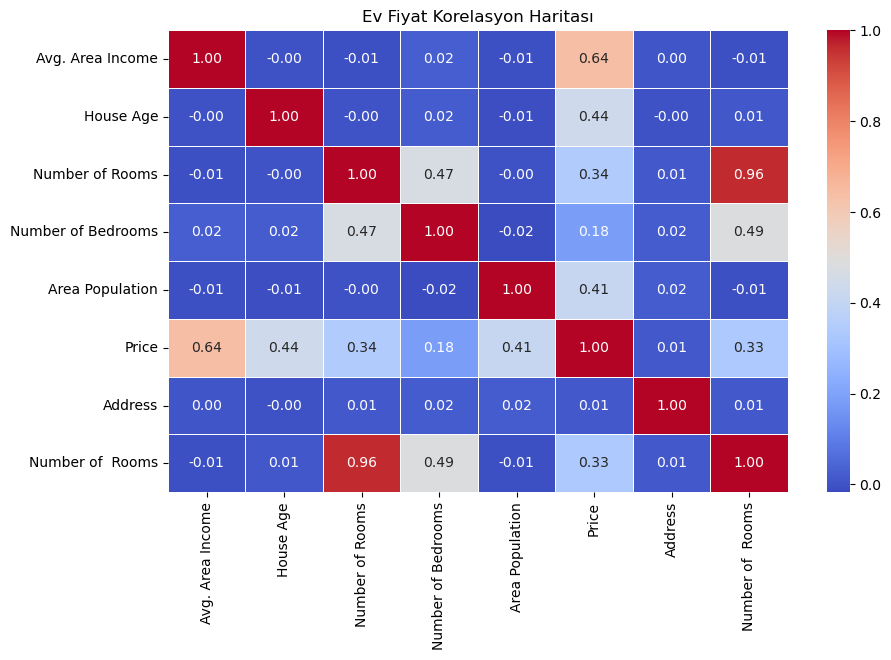

In [33]:
#Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

correlation=data.corr()

plt.figure(figsize=(10,6))

sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt=".2f", linewidths=0.5)

plt.title('Ev Fiyat Korelasyon Haritası')

In [41]:
#Tahminlerle fiyat karşılaştırması
y_predic=y_predic.round().astype(int)
y_test_values=y_test.values.round().astype(int)
y_predic=y_predic.flatten()
y_test_values=y_test.values.flatten()

result_data=pd.DataFrame({'Asıl Fiyat':y_test_values,"Tahmin fiyatı":y_predic})

#Birkaç satır
result_data.head()


,Asıl Fiyat,Tahmin fiyatı
0,1399663,1239158
1,398910,404502
2,744000,1043447
3,1312467,1336758
4,1393747,1426680
